<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Vandermonde_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Vandermonde Method of Lowest-Degree Polynomial Interpolation

Given a set of points $S = (x_1, p(x_1)), (x_2, p(x_2)), \dots, (x_n, p(x_n))$, we can construct the polynomial of lowest degree $p(x)$ which passes through each point with the following structure:

$p(x) = \sum_{i=1}^n c_ix^{n-i}$

In order to find the constants $c_1, c_2, \dots, c_n$, each point $(x_j, p(x_j)) \in S$ can be substituted into the above equation, like so:

$p(x_j) = \sum_{i=1}^n c_ix_j^{n-i}$

Solving $c_k$ for arbitrary $k$ is now as simple as solving a system of linear equations. The resultant *Vandermonde Matrix* can be reduced using [Gauss-Jordan elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). Following is an example of the Vandermonde Matrix for a sample of 5 points:

$\begin{bmatrix} \left. \begin{matrix} & {x_1}^4 & {x_1}^3 & {x_1}^2 & {x_1}^1 & {x_1}^0 \\ & {x_2}^4 & {x_2}^3 & {x_2}^2 & {x_2}^1 & {x_2}^0 \\ & {x_3}^4 & {x_3}^3 & {x_3}^2 & {x_3}^1 & {x_3}^0 \\ & {x_4}^4 & {x_4}^3 & {x_4}^2 & {x_4}^1 & {x_4}^0 \\ & {x_5}^4 & {x_5}^3 & {x_5}^2 & {x_5}^1 & {x_5}^0 \end{matrix} \right| \begin{matrix} -p(x_1) & \\ -p(x_2) & \\ -p(x_3) & \\ -p(x_4) & \\ -p(x_5) & \end{matrix} \end{bmatrix}$

Manipulating this matrix into reduced row-echelon form will produce the following result:

$\begin{bmatrix} \left. \begin{matrix} & 1 & 0 & 0 & 0 & 0 \\ & 0 & 1 & 0 & 0 & 0 \\ & 0 & 0 & 1 & 0 & 0 \\ & 0 & 0 & 0 & 1 & 0 \\ & 0 & 0 & 0 & 0 & 1 \end{matrix} \right| \begin{matrix} c_1 & \\ c_2 & \\ c_3 & \\ c_4 & \\ c_5 & \end{matrix} \end{bmatrix}$

From the last column in this matrix we now know $c_k$ and can construct a $p(x)$ that fits our set of points $S$.

Evaluating $p(x)$ for arbitrary $x$ is now trivial via [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method), eliminating redundant exponentiation:

$p(x) = c_1 + x(c_2 + x(c_3 + x(\dots (c_n))))\dots$

In [0]:
import numpy as np
from typing import Callable, List, Tuple

def vandermonde(points: List[Tuple[float, float]]) -> Callable[[float], float]:
  if len(points) == 0:
    return None
  
  vandermonde_matrix = [[x ** i for i in reversed(range(len(points)))] for x, y in points]

  coefficients = np.linalg.solve(vandermonde_matrix, [y for x, y in points])

  def interpolation(x: float) -> float:
    accumulator = coefficients[0]
    for coefficient in coefficients[1:]:
      accumulator *= x
      accumulator += coefficient
    return accumulator
  
  return interpolation

In [0]:
points = [
  (2, 5),
  (3, 6),
  (6.8, 12),
  (7, 4),
]

polynomial = vandermonde(points)

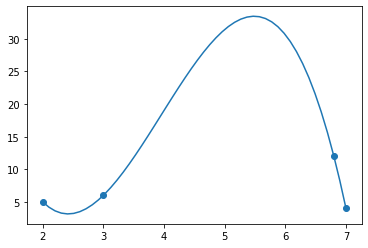

In [3]:
from matplotlib import pyplot as plt

xs, ys = zip(*points)

plt.scatter(xs, ys)

interpolation_xs = np.linspace(min(xs), max(xs))
interpolation_ys = [polynomial(x) for x in interpolation_xs]

plt.plot(interpolation_xs, interpolation_ys)
plt.show()